In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
df = pd.read_csv("../DATA/gene_expression.csv")

In [41]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [100]:
df['Cancer Present'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

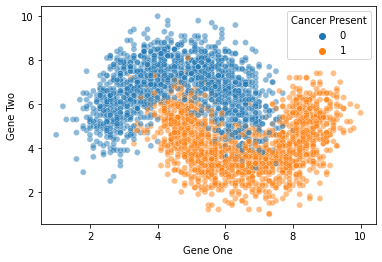

In [42]:
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present', data=df, alpha=0.5)

In [ ]:
df

In [43]:
len(df)

3000

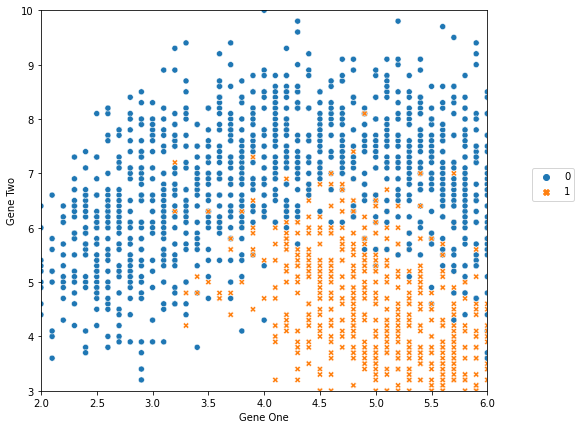

In [44]:
plt.figure(figsize=(8, 7))
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, style="Cancer Present")
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,0.5))

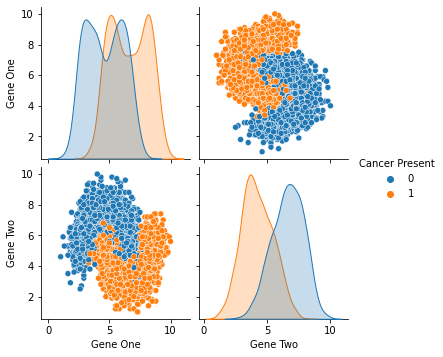

In [45]:
sns.pairplot(data=df, hue='Cancer Present')

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
X = df.drop('Cancer Present', axis=1)

In [48]:
y = df['Cancer Present']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
scaler = StandardScaler()

In [51]:
scaled_X_train = scaler.fit_transform(X_train)

In [52]:
scaled_X_test = scaler.transform(X_test)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
# help(KNeighborsClassifier)

In [56]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [57]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [58]:
y_pred = knn_model.predict(scaled_X_test)

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

In [60]:
confusion_matrix(y_test, y_pred)

array([[420,  50],
       [ 47, 383]], dtype=int64)

In [61]:
len(y_test)

900

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [64]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [65]:
from sklearn.metrics import accuracy_score

In [69]:
error = 1 - accuracy_score(y_test, y_pred)
error

0.10777777777777775

In [70]:
test_error_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    
    test_error_rates.append(test_error)

In [71]:
test_error_rates

[0.10777777777777775,
 0.09999999999999998,
 0.07444444444444442,
 0.07666666666666666,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.053333333333333344,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05666666666666664,
 0.05555555555555558,
 0.05777777777777782,
 0.05777777777777782]

Text(0.5, 0, 'K Neighbors')

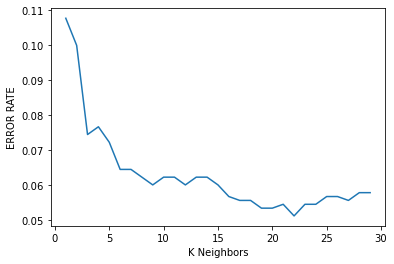

In [74]:
plt.plot(range(1, 30), test_error_rates)
plt.ylabel("ERROR RATE")
plt.xlabel("K Neighbors")

In [75]:
# PIPELINE --> GRIDSEARCH CV

In [76]:
scaler = StandardScaler()

In [77]:
knn = KNeighborsClassifier()

In [78]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [79]:
operations = [('scaler', scaler), ('knn', knn)]

In [80]:
from sklearn.pipeline import Pipeline

In [81]:
pipe = Pipeline(operations)

In [ ]:
from sklearn.model_selection import GridSearchCV

---
*Note: If your parameter grid is going inside a PipeLine, your parameter name needs to be specified in the following manner:**

* chosen_string_name + **two** underscores + parameter key name
* model_name + __ + parameter name
* knn_model + __ + n_neighbors
* knn_model__n_neighbors

[StackOverflow on this](https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline)

The reason we have to do this is because it let's scikit-learn know what operation in the pipeline these parameters are related to (otherwise it might think n_neighbors was a parameter in the scaler).

---

In [83]:
k_values = list(range(1, 20))

In [84]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [85]:
param_grid = {'knn__n_neighbors': k_values}

In [86]:
full_cv_classifier = GridSearchCV(pipe, 
                                  param_grid, 
                                  cv=5, scoring='accuracy')

In [89]:
# Use full X and y if you DON'T want a hold-out test set
# Use X_train and y_train if you DO want a holdout test set (X_test,y_test)
full_cv_classifier

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')


In [90]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [93]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [95]:
full_predictions = full_cv_classifier.predict(X_test)

In [96]:
print(classification_report(y_test, full_predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



# Final Model

In [97]:
new_patient = [[3.8, 6.4]]

In [98]:
full_cv_classifier.predict(new_patient)

array([0], dtype=int64)

In [99]:
full_cv_classifier.predict_proba(new_patient)

array([[1., 0.]])